<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressior 
* customer analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [7]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/mushrooms.csv')
raw.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
x = raw[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = raw['class']
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [11]:
x.columns = [a.replace('-', '_') for a in x.columns]
x.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [13]:
x_ = pd.get_dummies(x)

In [14]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)


In [16]:
fit_lg = LogisticRegression().fit(x_tr, y_tr)
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

In [17]:
pred_lg = fit_lg.predict(x_te)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [18]:
accuracy_score(y_te, pred_lg), accuracy_score(y_te, pred_rf)

(0.9987694831829368, 1.0)

7919    0
6554    1
3282    1
7430    1
3219    0
       ..
6730    1
7072    1
121     0
6724    1
3086    0
Name: p, Length: 2438, dtype: uint8

In [28]:
fpr, tpr, thre = roc_curve(pd.get_dummies(y_te).iloc[:,-1], proba_rf)

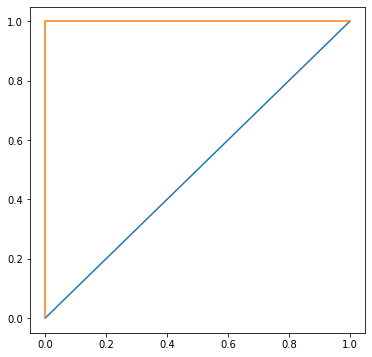

In [29]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)

# customer analysis

In [30]:
os.listdir()

['.config',
 'shops.csv',
 'rfm_test.csv',
 'sample_submission.csv',
 'items.csv',
 'retail_data_response.csv',
 'online_retail_II.xlsx',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'item_categories.csv',
 'test.csv',
 'ecommerce-data.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [37]:
df = pd.read_csv('retail_data_transactions.csv')
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [38]:
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [40]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['month'] = df['trans_date'].to_numpy().astype('datetime64[M]')

In [42]:
df.columns = ['id', 'date', 'rev', 'month']
df.head()

,id,date,rev,month
0,CS5295,2013-02-11,35,2013-02-01
1,CS4768,2015-03-15,39,2015-03-01
2,CS2122,2013-02-26,52,2013-02-01
3,CS1217,2011-11-16,99,2011-11-01
4,CS1850,2013-11-20,78,2013-11-01


In [44]:
df = df.groupby(['id', 'month', 'date'])['rev'].sum().reset_index().sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,month,date,rev
14,CS1112,2015-01-01,2015-01-14,39
13,CS1112,2014-12-01,2014-12-04,59
12,CS1112,2014-07-01,2014-07-16,90
11,CS1112,2014-04-01,2014-04-29,63
10,CS1112,2013-11-01,2013-11-13,71


In [53]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby('id').head(3)
info_m = info_m.groupby('id')['money'].sum().reset_index()
info_m.head()

,id,money
0,CS1112,39.0
1,CS1113,220.0
2,CS1114,79.0
3,CS1115,55.0
4,CS1116,0.0


In [54]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'freq'], ascending = [1,0])
info_f = info_f.groupby('id').head(3)
info_f = info_f.groupby('id')['freq'].sum().reset_index()
info_f.head()

,id,freq
0,CS1112,3.0
1,CS1113,4.0
2,CS1114,6.0
3,CS1115,6.0
4,CS1116,3.0


In [56]:
df['date'].max()

Timestamp('2015-03-16 00:00:00')

In [57]:
date_now = datetime(2015,4,1)

In [61]:
info_r = df.groupby(['id']).agg({'date': lambda x : (date_now - x.iloc[0]).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,CS1112,77
1,CS1113,51
2,CS1114,48
3,CS1115,27
4,CS1116,219


In [62]:
info = pd.merge(pd.merge(info_f, info_m, 'left', 'id'), info_r, 'left', 'id')
info.head()

,id,freq,money,recency
0,CS1112,3.0,39.0,77
1,CS1113,4.0,220.0,51
2,CS1114,6.0,79.0,48
3,CS1115,6.0,55.0,27
4,CS1116,3.0,0.0,219


In [69]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321')),
            f = pd.qcut(info['freq'], 5, list('54321'))
            )
info.head()

,id,freq,money,recency,r,m,f
0,CS1112,3.0,39.0,77,3,3,5
1,CS1113,4.0,220.0,51,2,1,5
2,CS1114,6.0,79.0,48,2,2,3
3,CS1115,6.0,55.0,27,1,3,3
4,CS1116,3.0,0.0,219,5,5,5


In [71]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))

In [75]:
scaler = StandardScaler()
info_ = scaler.fit_transform(info.iloc[:,1:4])

In [81]:
km = KMeans(n_clusters = 3)

In [82]:
fit_km = km.fit(info_)

In [90]:
km_score = [KMeans(n_clusters = a).fit(info_).inertia_ for a in range(1, 10)]

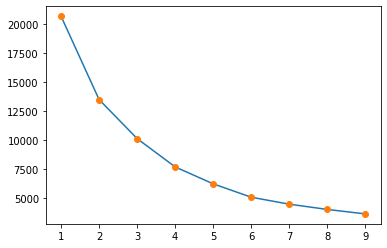

In [92]:
plt.plot(range(1, 10), km_score)
plt.plot(range(1, 10), km_score, 'o')

In [114]:
km = KMeans(n_clusters = 3)
fit_km = km.fit(info_)

In [115]:
fit_km.labels_

array([2, 0, 0, ..., 2, 1, 2], dtype=int32)

In [116]:
info['cl'] = fit_km.labels_.astype(str)
info.head()

,id,freq,money,recency,r,m,f,rf,cl
0,CS1112,3.0,39.0,77,3,3,5,35,2
1,CS1113,4.0,220.0,51,2,1,5,25,0
2,CS1114,6.0,79.0,48,2,2,3,23,0
3,CS1115,6.0,55.0,27,1,3,3,13,0
4,CS1116,3.0,0.0,219,5,5,5,55,2


In [117]:
avg_info = info.groupby(['cl'])['freq', 'money', 'recency'].mean().reset_index()
avg_info.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cl,freq,money,recency
0,0,6.334291,122.891203,44.555835
1,1,5.820344,0.101721,190.906883
2,2,4.078008,43.572368,76.941729
